### Basic Concept:
The fundamental idea behind SVMs is to find the optimal hyperplane that maximizes the margin between classes. This hyperplane is defined as the decision boundary that best separates the data points of one class from another. The points closest to the hyperplane are called support vectors, which influence the positioning and orientation of the hyperplane.

### Algorithm Overview:
1. **Linear SVM**:
   - For linearly separable data, SVM finds the hyperplane that maximizes the margin (distance) between the closest points of different classes.
   - The optimization objective is to maximize the margin while minimizing the classification error.

2. **Non-linear SVM (Kernel SVM)**:
   - When the data is not linearly separable in the original feature space, SVM can use kernel functions (e.g., polynomial, radial basis function (RBF), sigmoid) to map the data into a higher-dimensional space where it becomes linearly separable.
   - The hyperplane is then constructed in this higher-dimensional space.

### Key Parameters and Concepts:
- **Margin**: The distance between the hyperplane and the nearest data points from each class (support vectors). SVM aims to maximize this margin.
- **Regularization Parameter (C)**: Controls the trade-off between maximizing the margin and minimizing the classification error. A higher \( C \) allows more violations of the margin (soft margin), potentially leading to overfitting, while a lower \( C \) encourages a larger margin (hard margin) but may lead to underfitting.
- **Kernel**: Function used to map the original dataset into a higher-dimensional space. Common kernels include linear, polynomial, RBF, and sigmoid.
- **Support Vectors**: Data points that lie closest to the hyperplane and influence its position. Only these points are critical in defining the decision boundary.

### Optimization:
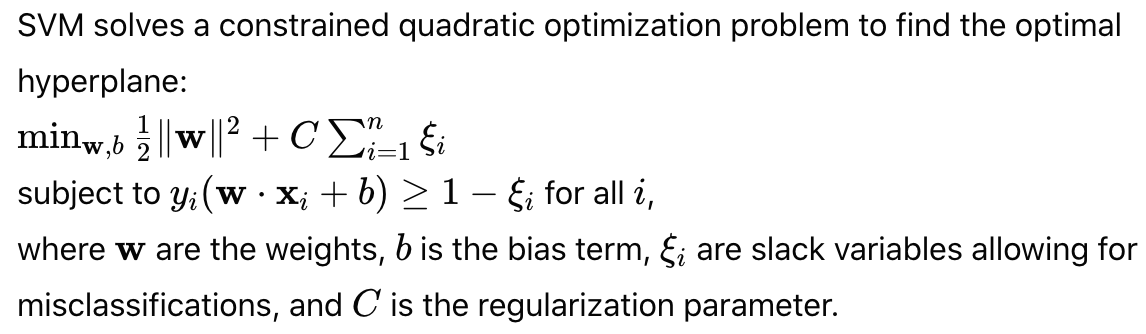

### Advantages:
- **Effective in High-Dimensional Spaces**: SVMs perform well even when the number of dimensions exceeds the number of samples.
- **Versatile**: Can handle linear and non-linear relationships through kernel functions.
- **Robust to Overfitting**: Especially when using a proper regularization parameter \( C \).

### Disadvantages:
- **Choice of Kernel**: Selecting the right kernel and its parameters can be challenging and may require domain knowledge or tuning.
- **Computationally Intensive**: Training time can be long for large datasets.
- **Sensitivity to Noise**: SVMs can be sensitive to noisy data and outliers.

### Applications:
- **Classification**: Identifying whether an example belongs to one of two classes.
- **Regression**: Predicting continuous outcomes.
- **Anomaly Detection**: Identifying unusual data points that do not fit a model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale # scale and center data
from sklearn.model_selection import GridSearchCV # do cross validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
from sklearn import datasets
from sklearn.svm import SVC

X,y = datasets.load_breast_cancer(as_frame=True, return_X_y=True)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42) # 90% training and 10% test
X_train = scale(X_train)
X_test = scale(X_test)

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)



SVC(random_state=42)

In [3]:
param_grid = [
    {    'C': [0.5, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.0001],
        'kernel': ['rbf']}
]

optimal_params = GridSearchCV(SVC(),
                              param_grid,
                              cv = 5,
                              scoring = 'accuracy',
                              verbose = 0)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [4]:
clf_svm = SVC(random_state=42, C=10, gamma=0.01)
clf_svm.fit(X_train, y_train)

ConfusionMatrixDisplay(clf_svm)